# Parsing Q
> QAnon is the weirdes – some say the most dangerous – conspiracy theory out there. Who is Q? Is it one person or many? Let's see what all of Q's aggregated posts tell us about them.

- comments: true
- author: Caglar Cakan
- categories: [QAnon, crawling]
- permalink: /parsing-q/
- image: images/parsing-q.png
- license: Creative Commons

[QAnon](https://en.wikipedia.org/wiki/QAnon), a far-right global conspiracy theory is one of the weirdest stories the internet (or 4chan/8chan/8kun in particular) has brought about. You're probably heard enough about the insane stories and its crazy supporters, so I won't go into any details here. What I'm interested in is what many of us would like to know: Who is Q? Is it one person or many? Is it a delusional psychopath or someone staging the biggest scam in the history of the internet? Is it an [ARG](https://mssv.net/2020/08/02/what-args-can-teach-us-about-qanon/)? Or is it all made up by the a US [pig farmer](https://medium.com/@registrarproject17/jim-watkins-is-q-the-russians-are-helping-him-and-other-adventures-b457848e210b) [who lives](https://medium.com/@registrarproject17/jim-watkins-is-q-the-russians-are-helping-him-and-other-adventures-b457848e210b) [in](https://themilsource.com/2020/09/01/could-q-really-be-a-pig-farmer-named-jim-watkins/) the [Philippines](https://www.washingtonpost.com/technology/2019/09/12/helicopter-repairman-leader-internets-darkest-reaches-life-times-chan-owner-jim-watkins/), [called](https://www.reddit.com/r/Qult_Headquarters/comments/e64g3h/evidence_for_jim_watkins_being_qanon/) [Jim Watkins](https://www.businessinsider.com/who-owns-8chan-jim-watkins-life-2019-8?r=DE&IR=T)? Does the NSA know who he is?

What we know:
* Q posts on 8kun and identifies using a [tripcode system](https://pastebin.com/P1g5RPWs).
* 8kun's admin is Ron Watkins, Jim Watkins' son.
* All posts are gathered on an aggregator called Qmap dot pub, which is [tied to Watkins](https://twitter.com/fr_brennan/status/1297616337984843776) and is [now offline](https://www.bloomberg.com/news/articles/2020-09-11/qanon-website-shuts-down-after-n-j-man-identified-as-operator).

Someone scraped all of Q's posts from Qmap days before it was taken offline. The entire dataset is provided here for anyone to [download](https://github.com/caglorithm/notebooks/raw/master/_notebooks/data/parsing_q/qmap.csv) and to play with. What follows is a basic and preliminary analysis of the aggregated posts of Q.

In [1]:
#hide
import json
from bs4 import BeautifulSoup
import glob
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import tqdm
import logging

In [2]:
#hide
plt.style.use("dark")

# Parse data

In [11]:
#hide
from os import path
csv_exists = path.exists("data/parsing_q/qmap.csv")

if not csv_exists:
    # if data wasn't extracted yet from the scraped data set, do so
    json_filenames = glob.glob("data/parsing_q/jsons/*.json")
    #qdf = pandas.DataFrame(columns=['id', 't', 'title', 'text'])
    all_data = []

    for json_filename in tqdm.tqdm(json_filenames[:]):
        with open(json_filename) as json_file:
            data = json.load(json_file)
            html_doc = data['sdata']
            try: 
                soup = BeautifulSoup(html_doc, 'html.parser')
                #print(soup.title)
                post_id = int(soup.title.text.split("#")[1].split("]")[0])
                dtm_str = soup.select("body > div.with-iconav > div > div.row.mb-4 > div.col-md-4.mb-3.mb-sm-0 > div > div.card-header > div:nth-child(3) > time")
                if len(dtm_str):
                    dtm_str = dtm_str[0].get('datetime')
                    post_datetime = datetime.datetime.strptime(dtm_str, '%Y-%m-%dT%H:%M:%S.%fZ')
                    post_title = soup.select("body > div.with-iconav > div > div.row.mb-4 > div.col-md-4.mb-3.mb-sm-0 > div > div.card-header > div:nth-child(2) > h5 > a")[0].text
                    post_tripcode = soup.select("body > div.with-iconav > div > div.row.mb-4 > div.col-md-4.mb-3.mb-sm-0 > div > div.card-header > div:nth-child(3) > span")[0].text
                    post_text = soup.select("body > div.with-iconav > div > div.row.mb-4 > div.col-md-4.mb-3.mb-sm-0 > div > div.card-body > div")[0].text
                    #logging.info(f"[#{post_id}] {post_datetime} - {post_title}")

                    all_data.append([post_id, post_tripcode, post_datetime, post_title, post_text])
                    #qdf.loc[post_id]['t'] = post_datetime
                    #qdf.loc[ji] = post_datetime
                else:
                    logging.warn("No datetime")
            except:
                pass
    #hide
    qdf = pandas.DataFrame(all_data, columns=['id', 'tripcode', 't', 'title', 'text'])
    qdf.to_csv("data/parsing_q/qmap.csv")

In [4]:
#hide
# just load from disk
qdf = pd.read_csv("data/parsing_q/qmap.csv")
qdf['t'] = pd.to_datetime(qdf['t'])
## Postprocessing
qdf['minute'] = qdf.t.dt.minute
qdf['hour'] = qdf.t.dt.hour
qdf['month'] = qdf.t.dt.month
qdf['year'] = qdf.t.dt.year

## The dataset

This is what the data set looks like:

In [5]:
#hide_input
qdf

,Unnamed: 0,id,tripcode,t,title,text,minute,hour,month,year
0,0,950,!UW.yye1fxo,2018-03-15 23:44:40,Trust Mike Pompeo (Kansas),\n\n Anonymous\nThu Mar 15 2018 23:43:08 GMT+0...,44,23,3,2018
1,1,3298,!!mG7VJxZNCI,2019-03-28 21:02:23,LOVE OF COUNTRY! #FLAGSOUT,https://twitter.com/tysoneberly/status/1111370...,2,21,3,2019
2,2,553,!UW.yye1fxo,2018-01-19 05:04:38,Military Intel & State Secrets,"The TELL.How can we listen in, track, and moni...",4,5,1,2018
3,3,3714,!!Hs1Jq13jV6,2019-12-17 21:23:02,Flynn FISA Was Illegal and Manipulated by the FBI,https://www.fisc.uscourts.gov/sites/default/fi...,23,21,12,2019
4,4,3108,!!mG7VJxZNCI,2019-03-18 02:42:20,Patriots in Control of Twitter?,"\nHello, Jack.png\n",42,2,3,2019
...,...,...,...,...,...,...,...,...,...,...
8956,8956,2119,!!mG7VJxZNCI,2018-09-08 18:33:44,Home of The Brave,There was a time when our children stood at at...,33,18,9,2018
8957,8957,2862,!!mG7VJxZNCI,2019-02-22 16:04:36,Accurate Memes of Bill and Loretta's Infamous ...,\nD0BB65WWwAEC8wP.jpg\nD0BJNbMX4AEiDfk.jpg\nD0...,4,16,2,2019
8958,8958,502,!UW.yye1fxo,2018-01-08 03:44:09,DEFCON 1 Stringer/Marker,Original [15] minDEFCON [1] CONF Revised [1] m...,44,3,1,2018
8959,8959,2768,!!mG7VJxZNCI,2019-02-17 22:04:54,Jussie Smollett False Flag Linked to Sen. Kama...,\nDzlpRPbVsAEYuyS.jpg-large.jpg\n,4,22,2,2019


# Analysis

These are the tripcodes that Q has used in the past:

In [6]:
#hide_input
print(" ".join(qdf['tripcode'].unique()))

!UW.yye1fxo !!mG7VJxZNCI !!Hs1Jq13jV6 !4pRcUA0lBE !xowAT4Z3VQ !CbboFOtcZs !ITPb.qbhqo !A6yxsPKia. !2jsTvXXmXs


Q has been getting lazy

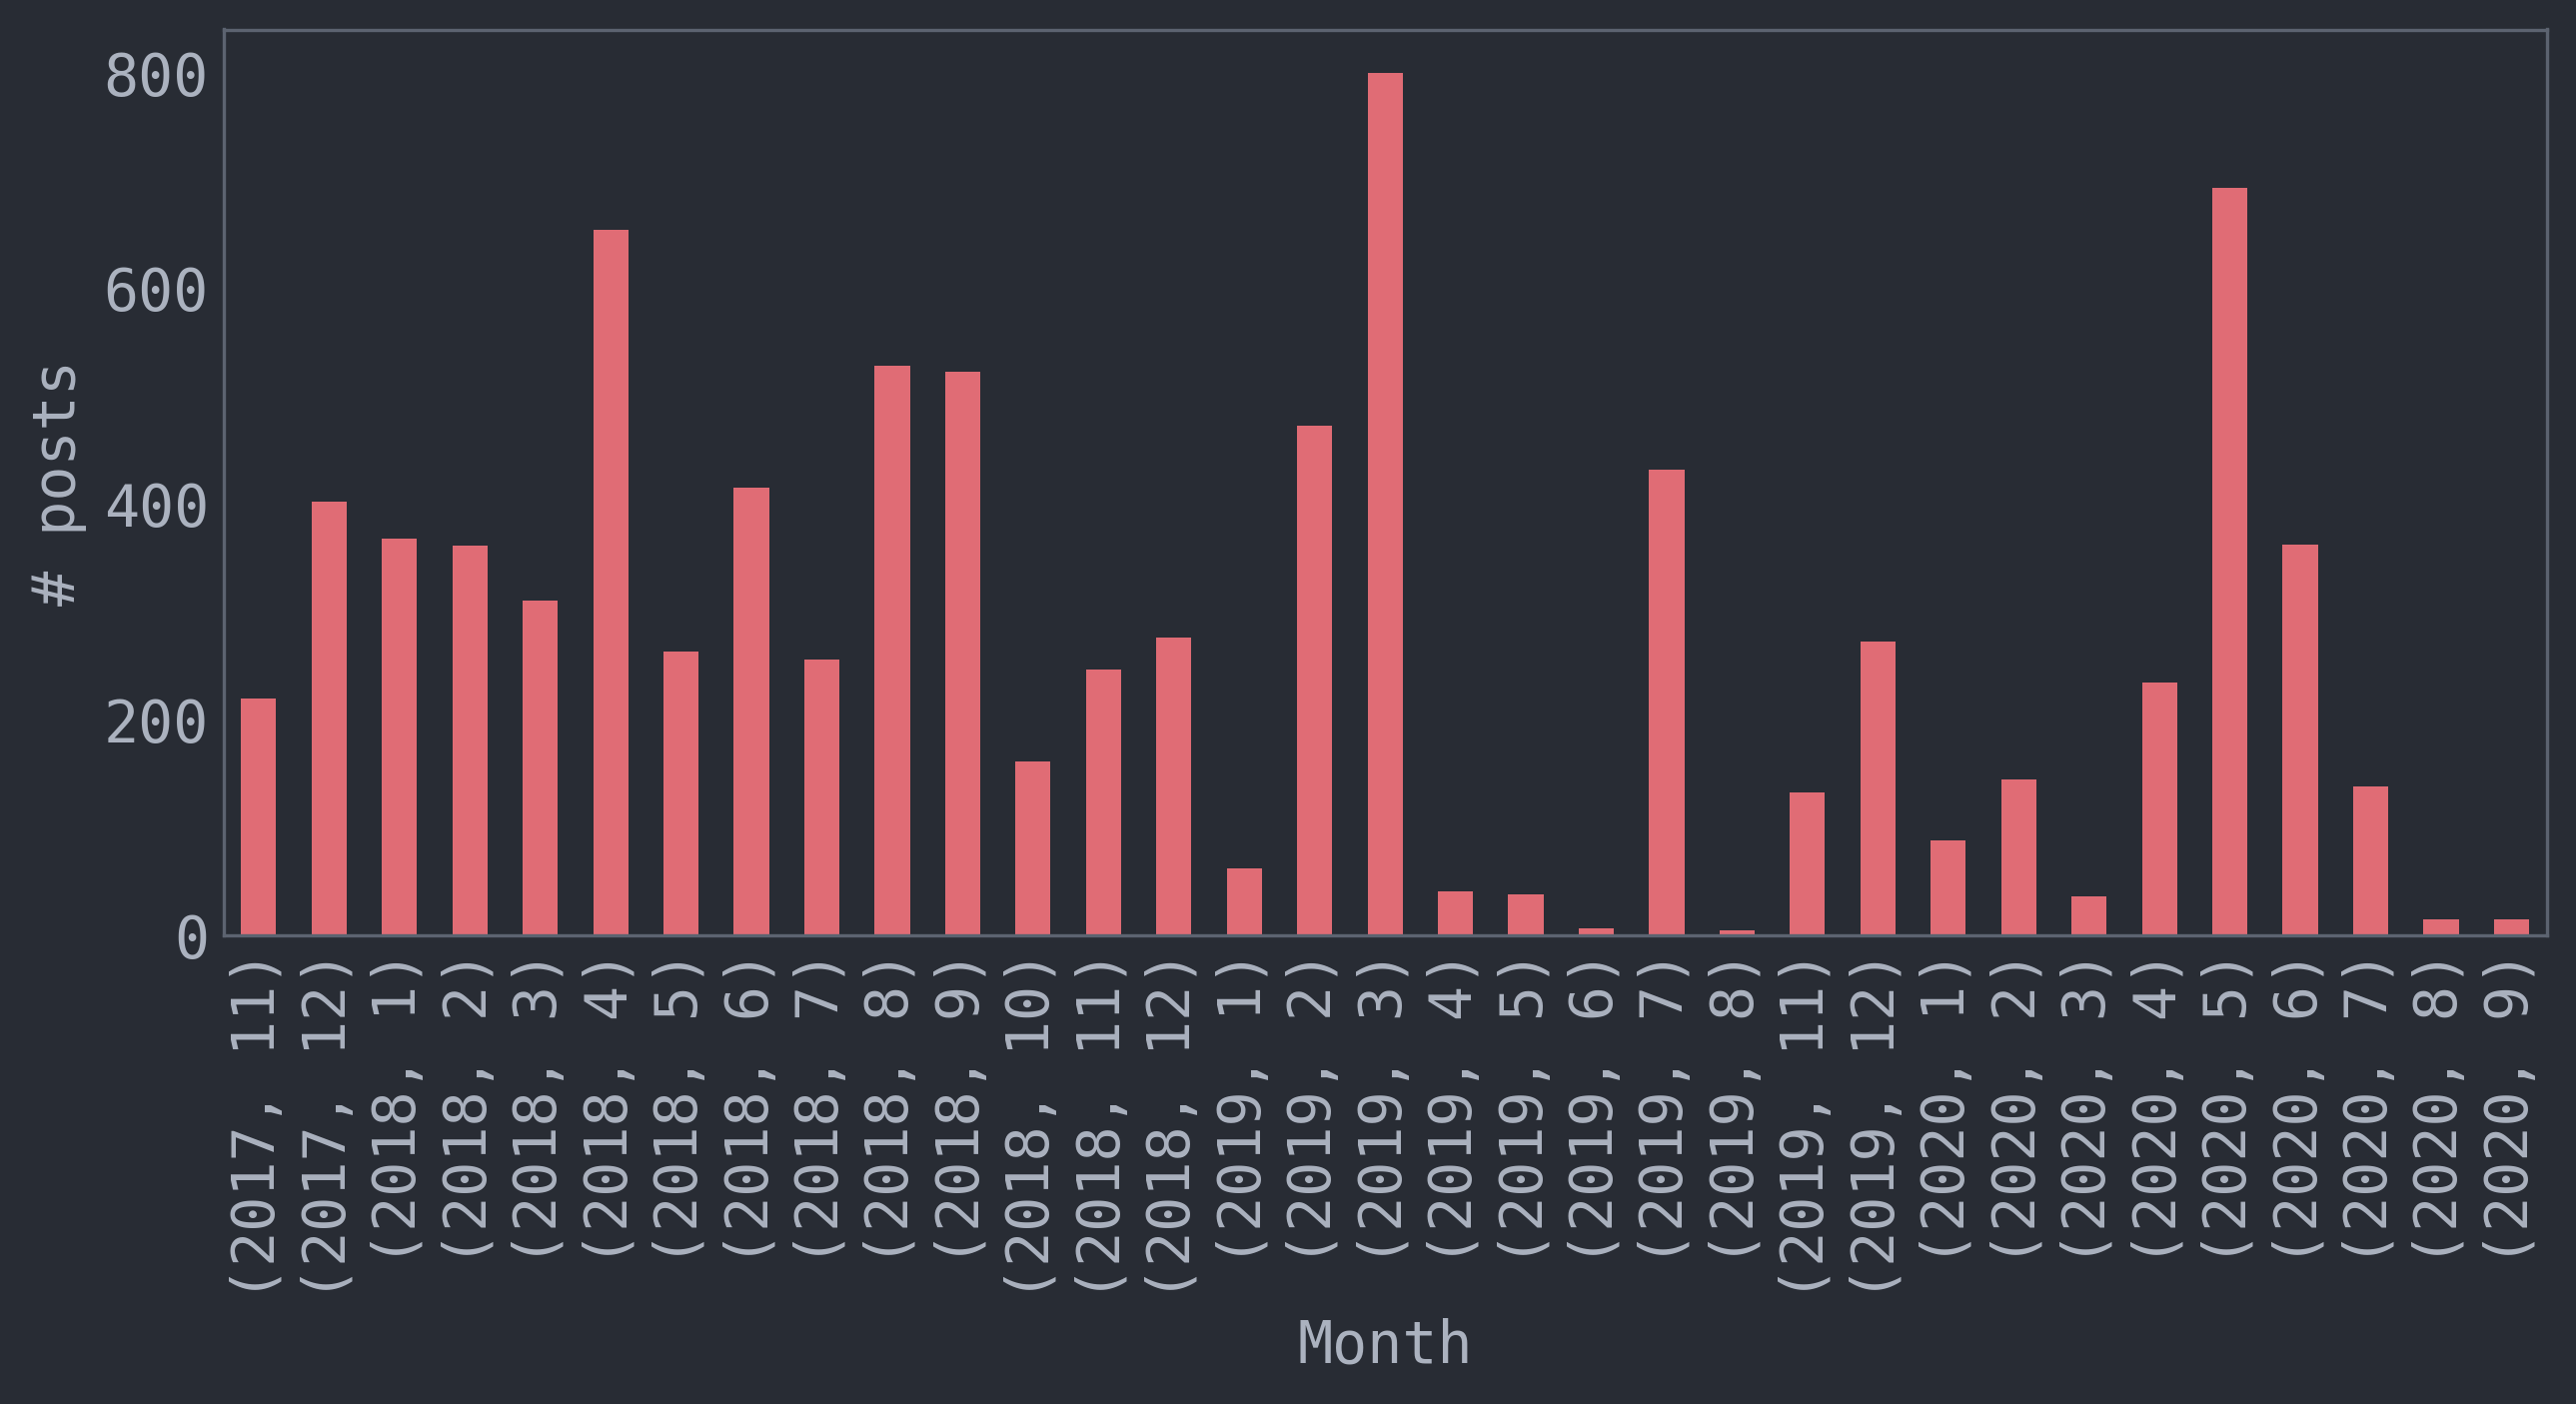

In [8]:
#hide_input
plt.figure(figsize=(10, 4))
qdf.groupby([qdf["t"].dt.year, qdf["t"].dt.month])['id'].count().plot(kind="bar")
plt.xlabel("Month")
plt.ylabel("# posts")
plt.show()

## At what time of the day does Q post?

In [27]:
#hide
# group tables into years
gb = qdf.groupby('year')    
df_years = [gb.get_group(x) for x in gb.groups]

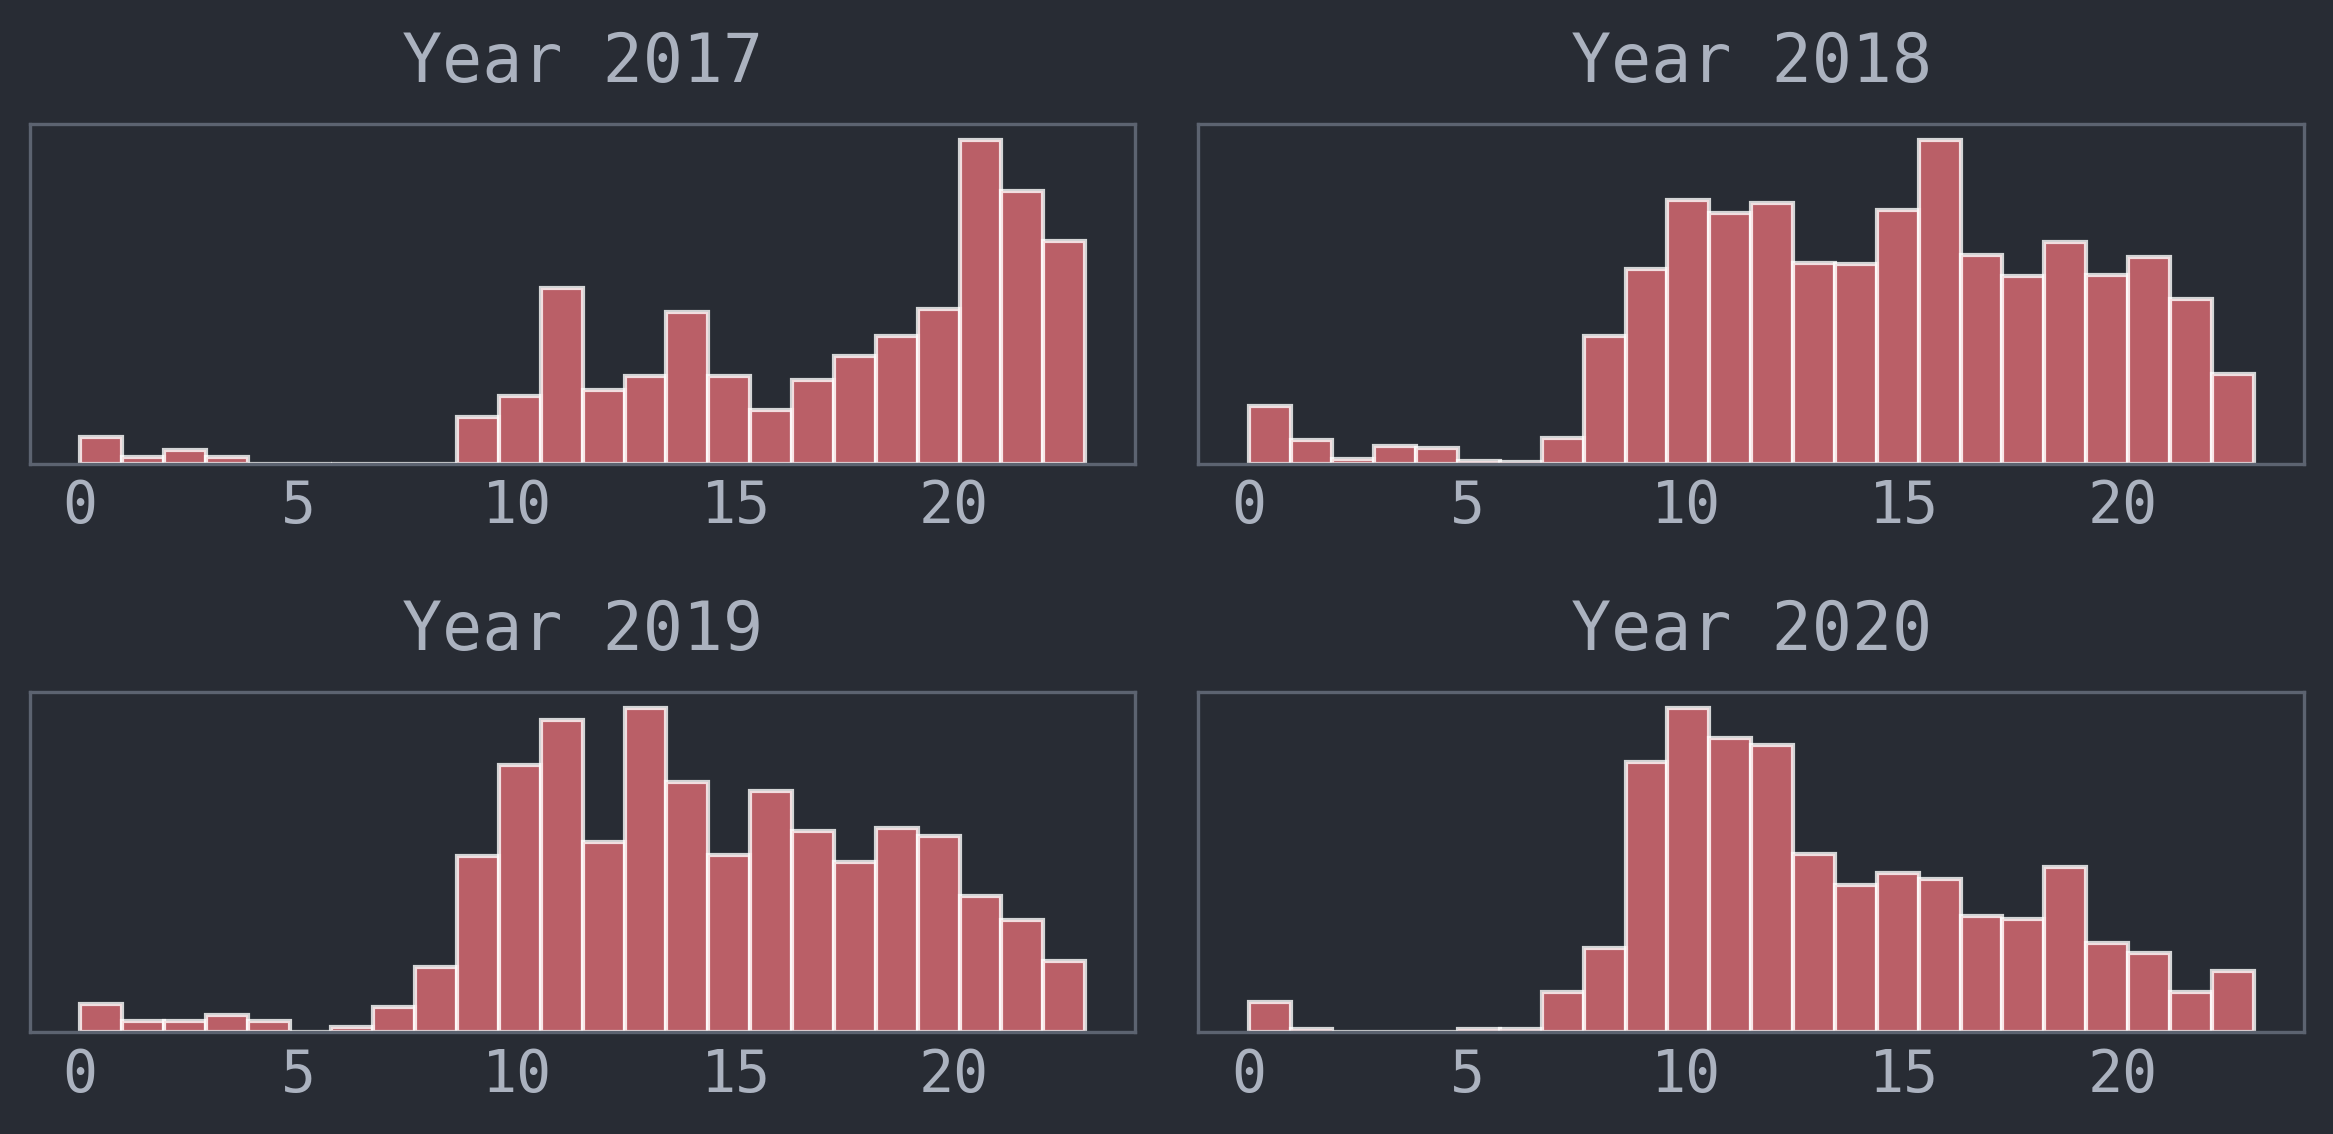

In [30]:
#hide_input
fig, axs = plt.subplots(2, 2, figsize=(8, 4))
for i, df in enumerate(df_years):
    #plt.figure(figsize=(3, 1.5))
    ax = axs[i//2, i%2]
    ax.set_title(f"Year {df['year'].iloc[0]}")
    ax.set_yticks([])
    #plt.hist(df['hour'], alpha=0.8, bins=24, edgecolor='w', density=False)
    ax.hist((df['hour']-7)%24, alpha=0.8, bins=24, edgecolor='w', density=False)
    #plt.hist((df['hour']-10)%24, alpha=0.4, bins=24, edgecolor='w', density=False)
plt.tight_layout()
plt.show()

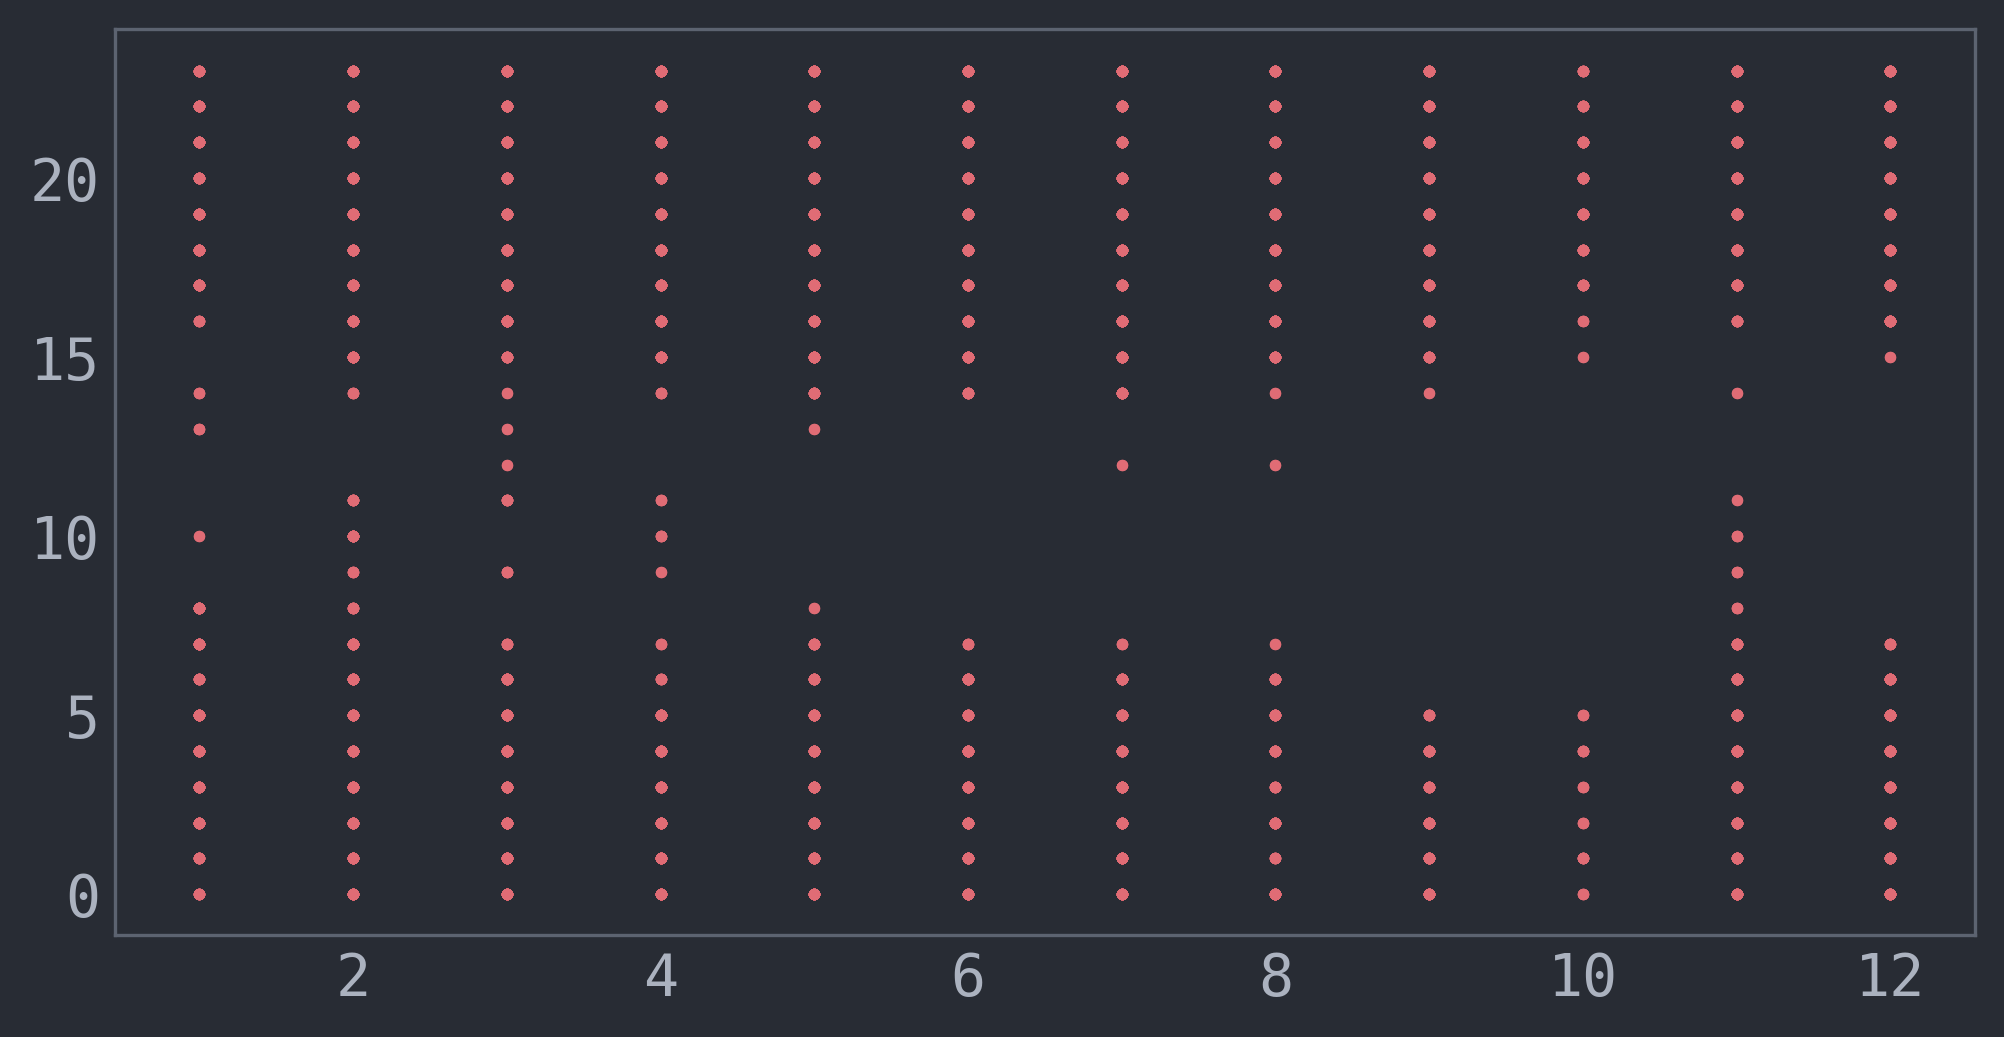

In [10]:
#hide
plt.scatter(qdf.t.dt.month, qdf.t.dt.hour, s=3)